In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('location_rev.csv')
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [5]:
df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


<AxesSubplot:xlabel='median_income', ylabel='revenue'>

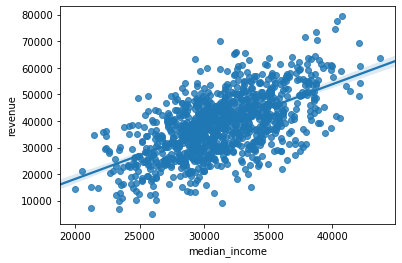

In [6]:
sns.regplot(x='median_income', y='revenue', data=df)

### median_income va revenue co moi quan he tuyen tinh voi nhau

<AxesSubplot:xlabel='median_income', ylabel='revenue'>

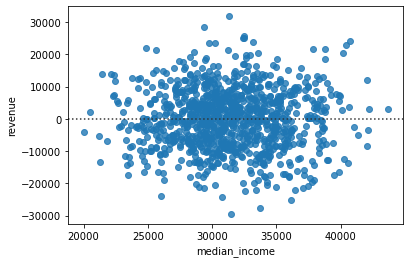

In [8]:
sns.residplot(df.median_income, df.revenue)

### Phuong sai rai rac khong deu. tap trung tu khoang 27k toi 35k tren truc x va 10k toi -15k tren truc y

## chuan bi du lieu train /test

In [9]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['median_income']]
y = df['revenue']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train) #huan luyen voi training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
y_pred = model.predict(X_test) #kiem tra voi X test

In [20]:
intercept = model.intercept_ # b
intercept

-18425.48476274992

In [24]:
# coef[0] vi simple linear. neu multiple linear thi sai coef tra ra list m theo thu tu m1, m2, m thu n
slope = model.coef_[0] # m
slope

1.817572492510132

## Danh gia model

In [25]:
# R ^2 cho toan bo du lieu
model.score(X, y)

0.36196581290430196

In [27]:
#R^2 khi train
model.score(X_train, y_train)

0.3802741630505213

In [28]:
#R^2 khi test
model.score(X_test, y_test)

0.3186154872023862

### ca train va test deu co R^2 thap => model bi underfitting
=> solution: them thuoc tinh cho input

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
mse = mean_squared_error(y_pred, y_test)
mse

91722735.6182985

In [32]:
mae = mean_absolute_error(y_pred, y_test)
mae

7781.855079949157

- Dat gioi han truc x va y la 100k de chung ta co dc cai nhin ro hon ve vi tri cua hau het cac diem du lieu
- them line co do doc 1 dong vai tro la tham chieu neu tat ca cac diem nam tren line nay dieu do co nghia la co mot moi quan he hoan hao giua thuc te va du doan

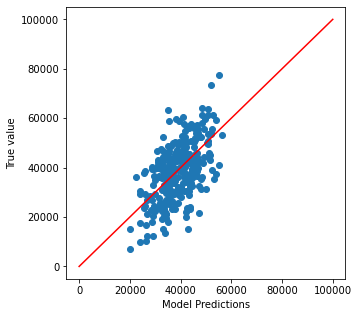

In [34]:
plt.figure(figsize=(5,5))
plt.scatter(model.predict(X_test), y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True value')
plt.plot([0, 100000], [0,100000],'k-', color='r')
plt.show()

In [36]:
X1 = df[['num_competitors','median_income','num_loyalty_members', 'population_density', 'location_age']]
y1 = df['revenue']

In [35]:
df.columns

Index(['revenue', 'num_competitors', 'median_income', 'num_loyalty_members',
       'population_density', 'location_age'],
      dtype='object')

In [37]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [38]:
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
y1_pred = model1.predict(X1_test)

In [40]:
model1.intercept_

-52707.68030419707

In [41]:
model1.coef_

array([-2.05764370e+03,  1.77826409e+00,  3.50411344e+00,  4.22972004e+00,
        2.04993740e+03])

### Danh gia model

In [45]:
model1.score(X1, y1)

0.8131236121155438

In [46]:
model1.score(X1_train, y1_train)

0.8136882173388532

In [47]:
model1.score(X1_test, y1_test)

0.8117808263851125

In [49]:
mse = mean_squared_error(y1_pred, y1_test)
mse

25336615.634087257

In [50]:
mae = mean_absolute_error(y1_pred, y1_test)
mae

4161.5757249418575

### Nhan xet: R^2 train va test nhu nhau, cung kha cao > 80%
mse va mae da giam nhiu so voi simple => chon model nay de du doan gia tri moi

In [51]:
X_new = pd.DataFrame({'num_competitors': [3],
                      'median_income': [30000],
                      'num_loyalty_members': [1200],
                      'population_density': [2000],
                      'location_age': [10]})
y_new = model1.predict(X_new)
y_new

array([27631.06159468])